In [1]:
# modules to use
import numpy as np
import pandas as pd

# read in the data
nfl_data = pd.read_csv("/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")

# set seed for reproducibility
np.random.seed(0)


/tmp/ipykernel_32/540425395.py:6: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("/kaggle/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")


In [2]:
# check some of the data for any visible missing data.
print(nfl_data.describe())
nfl_data.head()

             GameID          Drive            qtr           down  \
count  4.076880e+05  407688.000000  407688.000000  346534.000000   
mean   2.013158e+09      12.316158       2.577412       2.002476   
std    2.572839e+06       7.149527       1.129750       1.006353   
min    2.009091e+09       1.000000       1.000000       1.000000   
25%    2.011101e+09       6.000000       2.000000       1.000000   
50%    2.013111e+09      12.000000       3.000000       2.000000   
75%    2.015121e+09      18.000000       4.000000       3.000000   
max    2.017123e+09      35.000000       5.000000       4.000000   

           TimeUnder       TimeSecs   PlayTimeDiff          yrdln  \
count  407688.000000  407464.000000  407244.000000  406848.000000   
mean        7.374200    1695.268944      20.576762      28.488327   
std         4.642388    1062.801012      17.969326      12.946471   
min         0.000000    -900.000000       0.000000       1.000000   
25%         3.000000     778.000000       

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
# identify missing values
df_rows_null = nfl_data.isnull()
print(df_rows_null) # data frame with null value marked with boolean True / False
df_rows_null.sum() # trick to get the count on null_value on columns - True = 1

         Date  GameID  Drive    qtr   down   time  TimeUnder  TimeSecs  \
0       False   False  False  False   True  False      False     False   
1       False   False  False  False  False  False      False     False   
2       False   False  False  False  False  False      False     False   
3       False   False  False  False  False  False      False     False   
4       False   False  False  False  False  False      False     False   
...       ...     ...    ...    ...    ...    ...        ...       ...   
407683  False   False  False  False   True  False      False     False   
407684  False   False  False  False  False  False      False     False   
407685  False   False  False  False  False  False      False     False   
407686  False   False  False  False  False  False      False     False   
407687  False   False  False  False   True  False      False     False   

        PlayTimeDiff  SideofField  ...  yacEPA  Home_WP_pre  Away_WP_pre  \
0              False        False  

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

**That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:**

In [4]:
# calculate the percentage of missing cells out of the total cells in the dataframe
# create a function for reuse.

def get_null_info(df):
    """Receive a data frame, and return a DataFrame object contatininig:
        1. Missing value percentage
        2. Total number of values
        3. Total number of missing values"""
    total_cells = np.product(df.shape)
    print(total_cells)
    missing_cells = df.isnull().sum().sum()
    print(missing_cells)
    missing_pct = missing_cells / total_cells *100
    print(missing_pct)
    
    data = { 'Missing value pct.': [ missing_pct ],
            'Total number of values' : [total_cells],
            'Total number of missing values' : [missing_cells] }
    
    return pd.DataFrame(data)

In [5]:
get_null_info(nfl_data)

41584176
10342875
24.87214126835169


,Missing value pct.,Total number of values,Total number of missing values
0,24.872141,41584176,10342875


# 2. Figure out why the data is missing
> **Is this value missing because it wasn't recorded or because it doesn't exist?**   

This is the point at which we get into the part of data science that I like to call "data intution", by which I mean "really looking at your data and trying to figure out why it is the way it is and how that will affect your analysis". It can be a frustrating part of data science, especially if you're newer to the field and don't have a lot of experience. For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important questions you can ask yourself to help figure this out is this:   

If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation, and we'll learn how to do it next! :)



In [6]:
# look at the # of missing values for columns
missing_value_count = nfl_data.isnull().sum()
print(missing_value_count)

# looking at the first 10 columns only for now.
missing_value_count[0:10]

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64


Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

**Drop missing values**   
If you're in a hurry or don't have a reason to figure out why your values are missing, one option you have is to just remove any rows or columns that contain missing values. (Note: I **don't generally recommend this approch for important projects!** It's usually worth it to **take the time to go through your data and really look at all the columns with missing values one-by-one** to really get to **know your dataset**.)

In [7]:
# remove all of the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oh dear, it looks like that's **removed all our data!** 😱 This is **because every row in our dataset had at least one missing value**. We might have **better luck removing all the columns that have at least one missing value instead**.

In [8]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [9]:
# how many columns did we loose after the drop? use dataframe.shape --> (#col, #row)
print(nfl_data.shape[1])
print(columns_with_na_dropped.shape[1])

# 102 - 42 = 60 columns removed. removed all 'NaN's from the data


102
41


**Filling in missing values automatically**   

1. Another option is to **try and fill in the missing values**.     
2. For this next bit, I'm getting a **small sub-section of the NFL data** so that it will print well.

In [10]:
# to get a subset of data, slice the columns between 'EPA' and 'Season'
subset_nfl_data = nfl_data.loc[:, 'EPA':"Season"]  # all rows, 'EPA' ~ 'Season' columns
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [11]:
# decide what to fill the Nan with, here, let's fill them with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


**Backfill**    
Another method to fill Nan, replace missing values with whatever **value comes directly after it in the same column**. (This makes a lot of sense for datasets **where the observations have some sort of logical order to them**.)

In [12]:
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [13]:
# Fill the column value with NaN with the value that comes directly after it in the same column.
subset_nfl_data2 = subset_nfl_data.fillna(method='bfill', axis=0) # axis=0, along the rows, top to bottom
subset_nfl_data2

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,NaN,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


In [14]:
# then, the rest of the NaN's with 0.
subset_nfl_data2.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


In [15]:
# The above fillna() operations can be done in one line.
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,-0.343085,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
407683,0.000000,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,0.000000,-0.021795,-0.008136,2017
407684,-0.340818,0.056697,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,0.139913,-2.317201,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,0.000000,0.000000,0.000000,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,0.000000,0.000000,2017


**Handling missing values    
Exercise 1. Load the data and take a look at the data**    
/kaggle/input/building-permit-applications-data/Building_Permits.csv
San Francisco building permits data

In [16]:
# load required modules
import numpy as np
import pandas as pd

# read in the data
sf_permits = pd.read_csv("/kaggle/input/building-permit-applications-data/Building_Permits.csv")

# set seed for reproducibility - 0 
np.random.seed(0)

/tmp/ipykernel_32/2209524639.py:6: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv("/kaggle/input/building-permit-applications-data/Building_Permits.csv")


In [17]:
# inspect the first 5 rows
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


**Exercise 2. How many missing data points do we have?**

In [18]:
# get the number of missing data points per column
missing_values_count = sf_permits.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(sf_permits.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
percent_missing

26.26002315058403

**Exercise 3. Figure out why the data is missing?**

Look at the columns "**Street Number Suffix**" and "**Zipcode**" from the San Francisco Building Permits dataset. Both of these contain missing values.      

1. Which, if either, are missing because they don't exist?
1. Which, if either, are missing because they weren't recorded?

> If a value in the "Street Number Suffix" column is missing, it is likely because it does not exist. If a value in the "Zipcode" column is missing, it was not recorded.

**Exercise 4.**   
**Drop missing values: rows**

If you removed all of the rows of sf_permits with missing values, how many rows are left?

In [19]:
sf_permits.dropna().shape #(0, 43) 0 rows x 43 cols
sf_permits.dropna().shape[0] # 0

0

**Drop missing values: columns**

Try removing all the columns with empty values.

In [20]:
# remove all columns with at least one missing value
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)

# calculate number of dropped columns
cols_in_original_dataset = sf_permits.shape[1]
cols_in_na_dropped = sf_permits_with_na_dropped.shape[1]
dropped_columns = cols_in_original_dataset - cols_in_na_dropped

sf_permits_with_na_dropped


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


**Fill in missing values automatically**

Try replacing all the NaN's in the sf_permits data with the one that comes directly after it and then replacing any remaining NaN's with 0. Set the result to a new DataFrame sf_permits_with_na_imputed.

In [21]:
sf_permits_with_na_imputed = sf_permits.fillna(method="bfill", axis=0).fillna(0)

In [22]:
sf_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


# Approaches - Missing Values
https://www.kaggle.com/code/alexisbcook/missing-values/tutorial

1. * **Simple column drop**
1. * **Imputation - fill with values (e.g. mean of non-null values)**
1. * **Imputation extended - Apply imputation with a new 'flag' column (boolean) - '_was_missing'**

In [23]:
# import modules
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data (Melbourne Housing Data)
data = pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

# quick data review
data.head() # 5x21

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [24]:
# Set prediction target value
y = data.Price

In [25]:
# Set predictors (input variables, independent variables, features, estimators, to predict the target)
# Here, using only numerical values for preditors, to exlcude other data types

# drop 'Price' column
melb_predictors = data.drop(['Price'], axis=1)

# check the result data frame
print(melb_predictors.head())

# check the data types in the data to decide what types to be included / excluded
# Will only use numerical types for this project
print(melb_predictors.dtypes) # column-data_type
print(melb_predictors.dtypes.value_counts()) # data_type - count
X = melb_predictors.select_dtypes(exclude = ['object']) # drop the columns in 'object' type
print(X)

# split the data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Apply three missing-value handling approaches above to the model
# and measure the each performance for comparison. 

# Will use RandomFrestRegressor model for training / MAE for accuracy measurement
# Define a function to do them.

       Suburb           Address  Rooms Type Method SellerG       Date  \
0  Abbotsford      85 Turner St      2    h      S  Biggin  3/12/2016   
1  Abbotsford   25 Bloomburg St      2    h      S  Biggin  4/02/2016   
2  Abbotsford      5 Charles St      3    h     SP  Biggin  4/03/2017   
3  Abbotsford  40 Federation La      3    h     PI  Biggin  4/03/2017   
4  Abbotsford       55a Park St      4    h     VB  Nelson  4/06/2016   

   Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0       2.5    3067.0       2.0       1.0  1.0     202.0           NaN   
1       2.5    3067.0       2.0       1.0  0.0     156.0          79.0   
2       2.5    3067.0       3.0       2.0  0.0     134.0         150.0   
3       2.5    3067.0       3.0       2.0  1.0      94.0           NaN   
4       2.5    3067.0       3.0       1.0  2.0     120.0         142.0   

   YearBuilt CouncilArea  Lattitude  Longtitude             Regionname  \
0        NaN       Yarra   -37.7996    144

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
# Define a model, train, predict and evaluate using a training / validation datasets
def score_dataset(X_train, X_valid, y_train, y_valid):
    # define a model - here, using Radom Forest
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    # fit the model - training
    model.fit(X_train, y_train)
    # predict with the model
    preds = model.predict(X_valid)
    
    # return the MAE performance 
    return mean_absolute_error(y_valid, preds)
    

**Try each approach of handing missing-value of the dataset, and train and test the model**

**Approach 1: Simple Drop columns with missing values**

In [27]:
# What columns are with missing values?

# get columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] # if any value in a column is True, meaning missing value in this example, save it to a list using list comprehension

# drop the selected columns, on botth training / validation dataset
reduced_X_train = X_train.drop(cols_with_missing, axis = 1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis = 1)

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 1 (Drop columns with missing values.)")
score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid) # 183550.22137772635

#print(X_train.columns)
#is_na = X_train.columns.isnull()
#type(is_na)
#help(X_train.columns.isnull)
#help(is_na.any)


MAE from Approach 1 (Drop columns with missing values.)


183550.22137772635

**Approach 2. Imputation**   
SimpleImputation from scikit-learn, by default, replacing the NaN with mean value of the column    
    
* imputed_X_train = pd.DataFrame(my_imputer.**fit_transform(X_train)**) performs imputation on the training data X_train using the fit_transform() method. The fit_transform() method fits the imputer to the training data and transforms it in a single step. The missing values are replaced with the appropriate imputed values, and the result is converted into a new Pandas DataFrame imputed_X_train.

* imputed_X_valid = pd.DataFrame(my_imputer.**transform(X_valid)**) applies the same imputer instance to the validation data X_valid using the transform() method. **The transform() method applies the learned imputation strategy from the training data to the validation data.** The missing values in X_valid are replaced with imputed values, and the result is converted into a new Pandas DataFrame imputed_X_valid.

In [28]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train)) # impute the X_train with missing values --> df
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid)) # impute the X_valid with the same stratigies used in X_train imputation

# Restore columns removed during imputation
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 2 (Imputation):")
score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)  # 178166.46269899711


MAE from Approach 2 (Imputation):


178166.46269899711

**We see that Approach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset.**

**Approach 3 (An Extension to Imputation)**    
Impute the missing values, while also keeping track of which values were imputed, adding _missing_value

In [29]:
# Will be adding columns to track the missing values, work it on copy of the dataset.
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

In [30]:
# use the list of columns containing any missing values created earlier
# create a new column with suffix '_missing_value'
for col in cols_with_missing:
    X_train_plus[col + '_missing_value'] = X_train_plus[col].isnull() # set values for the column True/False
    X_valid_plus[col + '_missing_value'] = X_valid_plus[col].isnull() # set values for the column True/False

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus)) # impute, column labels to be lost
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))     # impute the same way as done on X_train, column labesl to be lost

# Restore the column labels
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Use the helper function to create a model, train and MAE peformance measurement.
print("MAE from Approach 3 (An Extension to Imputation):")
score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)  # 178927.503183954

MAE from Approach 3 (An Extension to Imputation):


178927.503183954

**As we can see, Approach 3 performed slightly worse than Approach 2.**

## So, why did imputation perform better than dropping the columns?

> **The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, *dropping the columns removes a lot of useful information*, and so it makes sense that imputation would perform better.**

In [31]:
# shape of the training data
print(X_train.shape) # (10864, 12)

# value count by column
value_count = X_train.isnull().sum()
missing_value_count = value_count[value_count > 0]
print(missing_value_count)

# total missing value count
total_missing_value_count = X_train.isnull().sum().sum() # trick to add up all TRUE's as 1's - 9512
print(total_missing_value_count)

(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64
9512


In [32]:
X_train.isnull().sum().sum()

9512

In [33]:
value_count
missing_value_count

Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64

## Conclusion
### As is common, imputing missing values (in Approach 2 and Approach 3) yielded better results, relative to when we simply dropped columns with missing values (in Approach 1).

In [34]:
print("!!Next" + " ===========>"*5)

!!Next ===========> ===========> ===========> ===========> ===========>


# Scaling and Normalization   
How to scale and normalize data and what are the differences

**Environment setup**

In [35]:
# modules required

import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats  

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling  

# plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# set seed for repoducibility
np.random.seed(0)  


**Scaling**

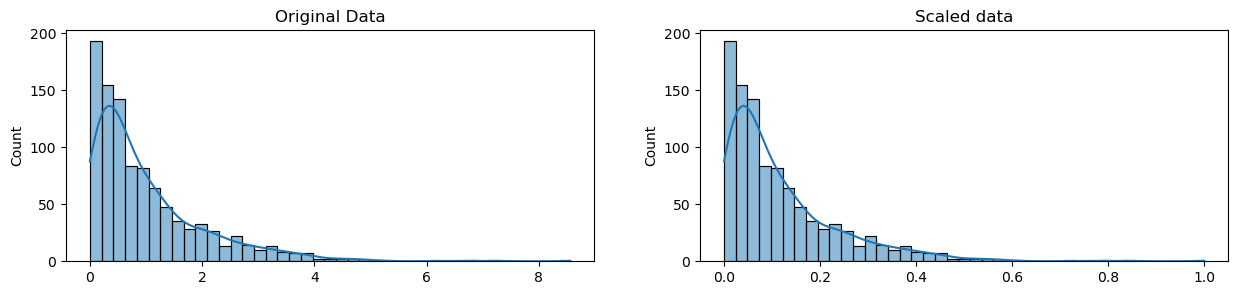

In [36]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

**Normalization**

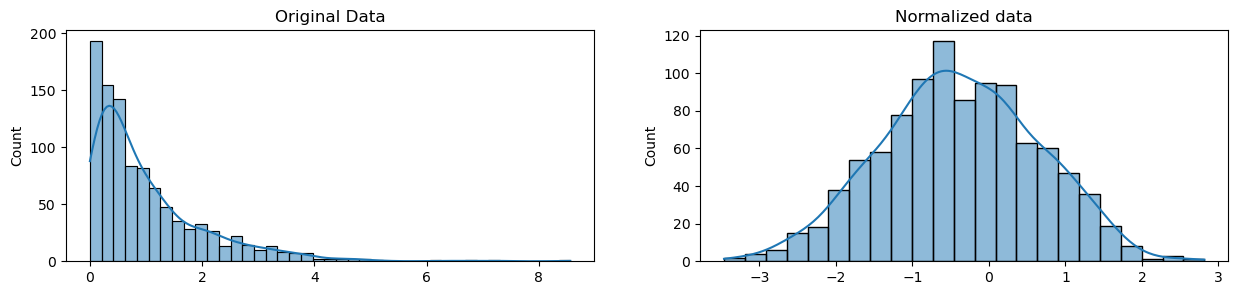

In [37]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

**Exercise: Scaling and Normalization**

**Environment set up**    
To use a dataset of Kickstarter campaigns. (Kickstarter is a website where people can ask people to invest in various projects and concept products.)   
[Kickstarter Projects - More than 300,000 kickstarter projects](https://www.kaggle.com/datasets/kemical/kickstarter-projects)

In [1]:
# modules
import pandas as pd
import numpy as np

# for Box-cox Transformation - Data normalization
from scipy import stats

# for min-max scaling - Data scaling
from mlxtend.preprocessing import minmax_scaling

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# load data
kickstarters_2017 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# looking at some data
kickstarters_2017.head()
kickstarters_2017.shape # (378661, 15)
kickstarters_2017.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


**Start by scaling the column 'goals' for each campagn - how much money do they need? 
After scaling, they all should be between 0 and 1.**    
'goals' represent the target amount of cloud-funding money for the project

In [40]:
# looking at the column before scaling the data
kickstarters_2017.usd_goal_real

0          1533.95
1         30000.00
2         45000.00
3          5000.00
4         19500.00
            ...   
378656    50000.00
378657     1500.00
378658    15000.00
378659    15000.00
378660     2000.00
Name: usd_goal_real, Length: 378661, dtype: float64

## **Exercise: Scaling and Normalization**

**Get the environment set up**

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**For the column - 'usd_goal_real'**    
1. Create a **DataFrame** original_goal_data containing the "**goal**" column
1. **Scale** the data using minmax_scaling()   
1. **Normalize** the data using stats.boxcox()

In [2]:
# select the usd_goal_real column

original_goal_data = pd.DataFrame(kickstarters_2017.goal)

print(original_goal_data)
print(type(original_goal_data))
print(original_goal_data.shape)
print(original_goal_data.columns)
print(original_goal_data.index)

           goal
0        1000.0
1       30000.0
2       45000.0
3        5000.0
4       19500.0
...         ...
378656  50000.0
378657   1500.0
378658  15000.0
378659  15000.0
378660   2000.0

[378661 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
(378661, 1)
Index(['goal'], dtype='object')
RangeIndex(start=0, stop=378661, step=1)


In [7]:
# Use original_goal_data to create a new DataFrame scaled_goal_data with values scaled between 0 and 1. 
# Use the minmax_scaling() function.

scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])
print(scaled_goal_data)
print(type(scaled_goal_data))

            goal
0       0.000010
1       0.000300
2       0.000450
3       0.000050
4       0.000195
...          ...
378656  0.000500
378657  0.000015
378658  0.000150
378659  0.000150
378660  0.000020

[378661 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [5]:
# Normalize the data, the amount of money pledged to each campaign - column 'usd_pledged_real'

print("\nPrinting 'kickstarters_2017.usd_pledged_real':\n", kickstarters_2017.usd_pledged_real)
print(type(kickstarters_2017.usd_pledged_real))
print("_"*70)

# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0  # returns a Series object - Boolean Series
print("\nPrinting 'index_of_positive_pledges':\n", index_of_positive_pledges)
print(type(index_of_positive_pledges)) 
print("_"*70)

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]  # With Boolean Series argument, the df filters the rows with True value
print("\nPrinting 'positive_pledges':\n", positive_pledges)
print(type(positive_pledges))
print("_"*70)

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

#normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0])  # boxcox() returns a tuple, the first return argument being the array of the transformed normailzed data, create a Series object with the same name and index as used in the original data

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))


Printing 'kickstarters_2017.usd_pledged_real':
 0            0.0
1         2421.0
2          220.0
3            1.0
4         1283.0
           ...  
378656      25.0
378657     155.0
378658      20.0
378659     200.0
378660     524.0
Name: usd_pledged_real, Length: 378661, dtype: float64
<class 'pandas.core.series.Series'>
______________________________________________________________________

Printing 'index_of_positive_pledges':
 0         False
1          True
2          True
3          True
4          True
          ...  
378656     True
378657     True
378658     True
378659     True
378660     True
Name: usd_pledged_real, Length: 378661, dtype: bool
<class 'pandas.core.series.Series'>
______________________________________________________________________

Printing 'positive_pledges':
 1          2421.0
2           220.0
3             1.0
4          1283.0
5         52375.0
           ...   
378656       25.0
378657      155.0
378658       20.0
378659      200.0
378660      524.

<class 'pandas.core.series.Series'>


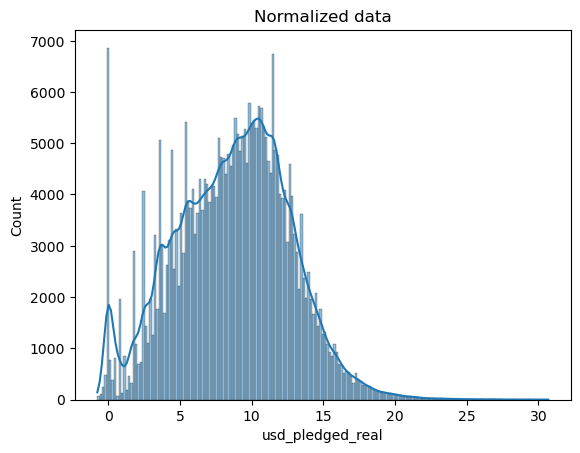

In [6]:
# plot normalized data
print(type(normalized_pledges))
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
#print(type(ax))
plt.show()

In [ ]:
# plot scaled data
print(type(scaled_goal_data))
ax = sns.histplot(scaled_goal_data, kde=True)
ax.set_title("Scaled data")
#print(type(ax))
plt.show()

<class 'pandas.core.frame.DataFrame'>



KeyboardInterrupt



# Parsing Dates
Dataset: Landslides After Rainfall, 2007-2016

**loading modules, data, setting reproducibility**

In [15]:
# import modules to use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# load the data
landslides = pd.read_csv("/kaggle/input/landslide-events/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

In [16]:
# check data
print(landslides.head())
print(landslides.shape)  # (1693, 23)
print(landslides.columns)

   id     date   time continent_code   country_name country_code  \
0  34   3/2/07  Night            NaN  United States           US   
1  42  3/22/07    NaN            NaN  United States           US   
2  56   4/6/07    NaN            NaN  United States           US   
3  59  4/14/07    NaN            NaN         Canada           CA   
4  61  4/15/07    NaN            NaN  United States           US   

  state/province  population         city/town  distance  ...  \
0       Virginia       16000       Cherry Hill   3.40765  ...   
1           Ohio       17288  New Philadelphia   3.33522  ...   
2   Pennsylvania       15930       Wilkinsburg   2.91977  ...   
3         Quebec       42786       Châteauguay   2.98682  ...   
4       Kentucky        6903         Pikeville   5.66542  ...   

                                 geolocation  hazard_type      landslide_type  \
0  (38.600900000000003, -77.268199999999993)    Landslide           Landslide   
1  (40.517499999999998, -81.4304999999

**column types?**

In [21]:
print(landslides.dtypes)
# Will work with date-like columns - 'date' column...

id                        int64
date                     object
time                     object
continent_code           object
country_name             object
country_code             object
state/province           object
population                int64
city/town                object
distance                float64
location_description     object
latitude                float64
longitude               float64
geolocation              object
hazard_type              object
landslide_type           object
landslide_size           object
trigger                  object
storm_name               object
injuries                float64
fatalities              float64
source_name              object
source_link              object
dtype: object


In [27]:
# peek at the column 'date'
print(landslides['date'].head())
# 'date' column showing as object type, meaning Python does not recognize as datetime64 data type.
print(landslides['date'].dtype)

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object
object


**convert the 'date' object to 'date' datetime64 by the format as specified**     
Checkout the list of date formats: [Python strftime cheatsheet](https://www.kaggle.com/code/alexisbcook/parsing-dates/tutorial)

In [38]:
# create a new column, date_parsed, with the parsed data
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y") # to format "09/27/23"

# check and compare the columns
landslides[['date','date_parsed']]

# if want the pandas to infer the date format. - not recommended for always
# landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

,date,date_parsed
0,3/2/07,2007-03-02
1,3/22/07,2007-03-22
2,4/6/07,2007-04-06
3,4/14/07,2007-04-14
4,4/15/07,2007-04-15
...,...,...
1688,12/7/15,2015-12-07
1689,2/22/16,2016-02-22
1690,2/23/16,2016-02-23
1691,2/26/16,2016-02-26


In [44]:
print(landslides['date_parsed'].head())  # Name: date_parsed, dtype: datetime64[ns]

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]


**Try and get the day of the month from the date_parsed column**    
Try them on both original column and converted column - 'data', 'date_parsed'

In [48]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides   # Name: date_parsed, Length: 1693, dtype: float64
#day_of_month_landslides2 = landslides['date'].dt.day  # error - Can only use .dt accessor with datetimelike values

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

**THe dangers of parsing dates - mixing up the months and days.**    
Checking if the conversion makes sense by plotting the data

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


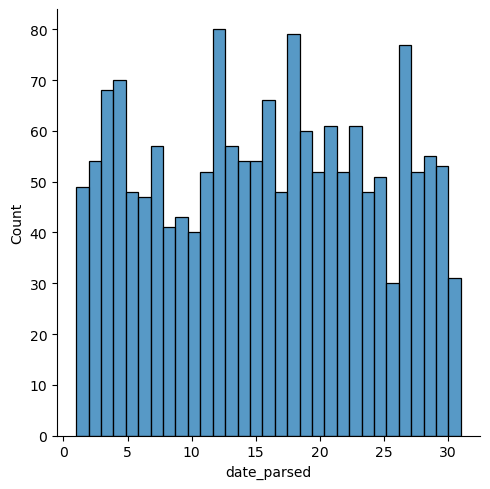

In [54]:
# drop NaN values, then draw distribution plot
day_of_month_landslides = day_of_month_landslides.dropna()
sns.displot(day_of_month_landslides, kde=False, bins=31)
#sns.histplot(day_of_month_landslides, kde=False, bins=31)

## Exercise: Parsing Dates

**Environment Setup**
 - modules, data, seeding

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read earthquake data
earthquakes = pd.read_csv("/kaggle/input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

**review data and check data type on column 'Date'**

In [59]:
print(earthquakes.head()) # what columns look like dates?
print(earthquakes.dtypes)
print(earthquakes.Date.dtype)  # object


         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

**Most of the entries in the "Date" column follow the same format: "month/day/four-digit year". However, the entry at index 3378 follows a completely different pattern. Run the code cell below to see this.**

In [60]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


**This does appear to be an issue with data entry: ideally, all entries in the column have the same format. We can get an idea of how widespread this issue is by checking the length of each entry in the "Date" column.**

In [85]:
date_lengths = earthquakes.Date.str.len()
print(date_lengths)
print(date_lengths.value_counts()) # length of 24 is an unusual length for date format

0        10
1        10
2        10
3        10
4        10
         ..
23407    10
23408    10
23409    10
23410    10
23411    10
Name: Date, Length: 23412, dtype: int64
10    23409
24        3
Name: Date, dtype: int64


**Looks like there are two more rows that has a date in a different format. Run the code cell below to obtain the indices corresponding to those rows and print the data.**

In [87]:
print(np.where([date_lengths == 24]))
# In NumPy, np.where() is a powerful function that allows you to perform conditional operations 
# and filtering on arrays. 
# It returns the indices where a given condition is satisfied in the array 
# or a new array with values based on the condition.

indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

(array([0, 0, 0]), array([ 3378,  7512, 20650]))
Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [72]:
#help(earthquakes.Date)

**Optional more practices**

# Character Encodings    

**Avoid UnicoodeDecodeErrors when loading CSV files**

**Environment setup**

In [12]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

**Mojibake issue & Unknown issue with incorrect character encoding**

In [89]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [90]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

In [93]:
help(before.encode)

Help on built-in function encode:

encode(encoding='utf-8', errors='strict') method of builtins.str instance
    Encode the string using the codec registered for encoding.
    
    encoding
      The encoding in which to encode the string.
    errors
      The error handling scheme to use for encoding errors.
      The default is 'strict' meaning that encoding errors raise a
      UnicodeEncodeError.  Other possible values are 'ignore', 'replace' and
      'xmlcharrefreplace' as well as any other name registered with
      codecs.register_error that can handle UnicodeEncodeErrors.



**The other data is the bytes data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:**

In [91]:
print(after)

b'This is the euro symbol: \xe2\x82\xac'


If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that our euro symbol has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [92]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


However, when we try to use a different encoding to map our bytes into a string, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.    
You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a CD player. If you try to play a cassette in a CD player, it just won't work.

In [94]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

For example, if we try to convert a string to bytes for ASCII using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it should have been. That means we may have just made our data unusable!

In [8]:
# start with a string
before = "This is the euro symbol: €"  # python3 string in utf-8 by default
#before

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors="replace")
#after   # b'This is the euro symbol: ?'

# convert it back to utf-8, the original string
print(after.decode("ascii"))  # the loss from above irreversible
# This is the euro symbol: ?

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character!


This is the euro symbol: ?


## This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files

**when reading a file not in UTF-8**

In [10]:
# try to read in a file not in UTF-8
import pandas as pd
kicstarter_2016 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201612.csv")

# UnicodeDecodeError


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 7955: invalid start byte

This tells us that this file isn't actually UTF-8. We don't know what encoding it actually is though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. A better way, though, is to use the **charset_normalizer** module to try and automatically guess what the right encoding is. **It's not 100% guaranteed to be right**, but it's usually **faster than just trying to guess**.

Now what....   
look at the **first ten thousand bytes** to guess the character encoding

In [13]:
# look at the first ten thousand bytes to guess the character encoding

# reading the file in read binary mode
with open("/kaggle/input/kickstarter-projects/ks-projects-201612.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the charset_normalizer detected for encoding for the first 10000 bytes
print(result)
    

{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


The charset_normalizer is 100% confident that the right encoding is "windows-1250"   
Check if it's correct reading the file using the detected encoding.

In [19]:
# read in the file with the encoding detected by charset_normalizer
kickstarter_2016 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201612.csv", encoding="Windows-1252")

# look at the first few lines
kickstarter_2016.head()

/tmp/ipykernel_32/2655017624.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201612.csv", encoding="Windows-1252")


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


**Saving your files with UTF-8 encoding after finding the right encoding and read the file.**

In [20]:
# save the file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

## Exercise: Character Encodings

**Environment set up**

In [21]:
# moudules
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

**1) What are encodings?   
working on a dataaset composed of bytes**

In [24]:
# sample entry
sample_entry = b'\xa7A\xa6n' # byte code characters
print(sample_entry)  # b'\xa7A\xa6n'
print("data type: ", type(sample_entry)) # <class 'bytes'>

b'\xa7A\xa6n'
data type:  <class 'bytes'>


**create a variable new_entry that changes the encoding from "big5-tw" to "utf-8". new_entry should have the bytes datatype.**

In [25]:
before = sample_entry.decode("big5-tw")
print(before, type(before))
new_entry = before.encode("utf-8", errors="replace")
print(new_entry, type(new_entry))

你好 <class 'str'>
b'\xe4\xbd\xa0\xe5\xa5\xbd' <class 'bytes'>


**2) Reading in files with encoding problems**

**Read in the file - PoliceKillingsUS.csv**

**Figure out what the correct encoding should be and read in the file to a DataFrame police_killings.**

In [33]:
#police_killings = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv")

# UnicodeDecodeError when reading with default encoding utf-8
# reading the file in read binary mode
with open("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the charset_normalizer detected for encoding for the first 10000 bytes
print(result) # {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}

# try read in the file with 'ascii' encoding
# police_killings = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding="ascii")
# UnicodeDecodeError - ascii was not the right encoding used for the file
# change the file read size from 10000 to 100000 bytes and detect again
with open("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(100000))
print(result)  # {'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}

# try read in the file with 'Windows-1258" encoding
police_killings = pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding="Windows-1258")
police_killings # file read successfully


{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
{'encoding': 'windows-1250', 'language': 'English', 'confidence': 1.0}


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


**3) Saving the files with UTF-8 encoding**

In [34]:
police_killings.to_csv("PoliceKillingsUS-utf8.csv")

# Incosistent Data Entry